<a href="https://colab.research.google.com/github/mythri1996/credit-card-lead-generation-ML-JOB-A-THON-/blob/main/CreditLeadGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import collections
from collections import Counter
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install missingno

In [ ]:
cd drive/MyDrive/credit\ lead\ generator

In [ ]:
ls

Credit_Card_Lead_Prediction.ipynb  submission.csv    train_s3TEQDk.csv
submission1.csv                    test_mSzZ8RL.csv  Untitled0.ipynb


####EDA

In [ ]:
train_data=pd.read_csv("train_s3TEQDk.csv")
test_data1=pd.read_csv("test_mSzZ8RL.csv")

In [ ]:
train_data.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
train_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
train_data.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


In [ ]:
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

#####Imputing missing *values*

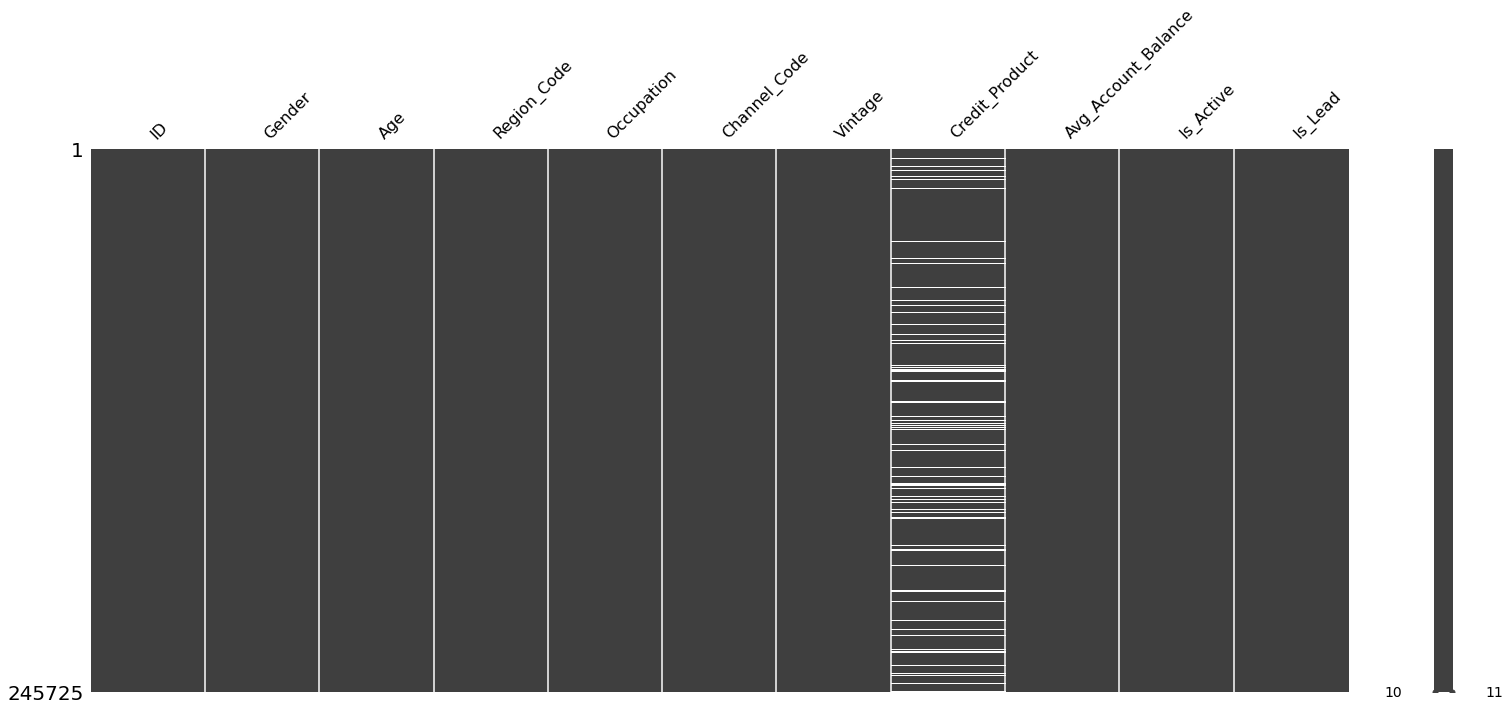

In [ ]:
msno.matrix(train_data)

In [ ]:
 245725 -29325

216400

In [ ]:
29325/245725*100

11.9340726421813

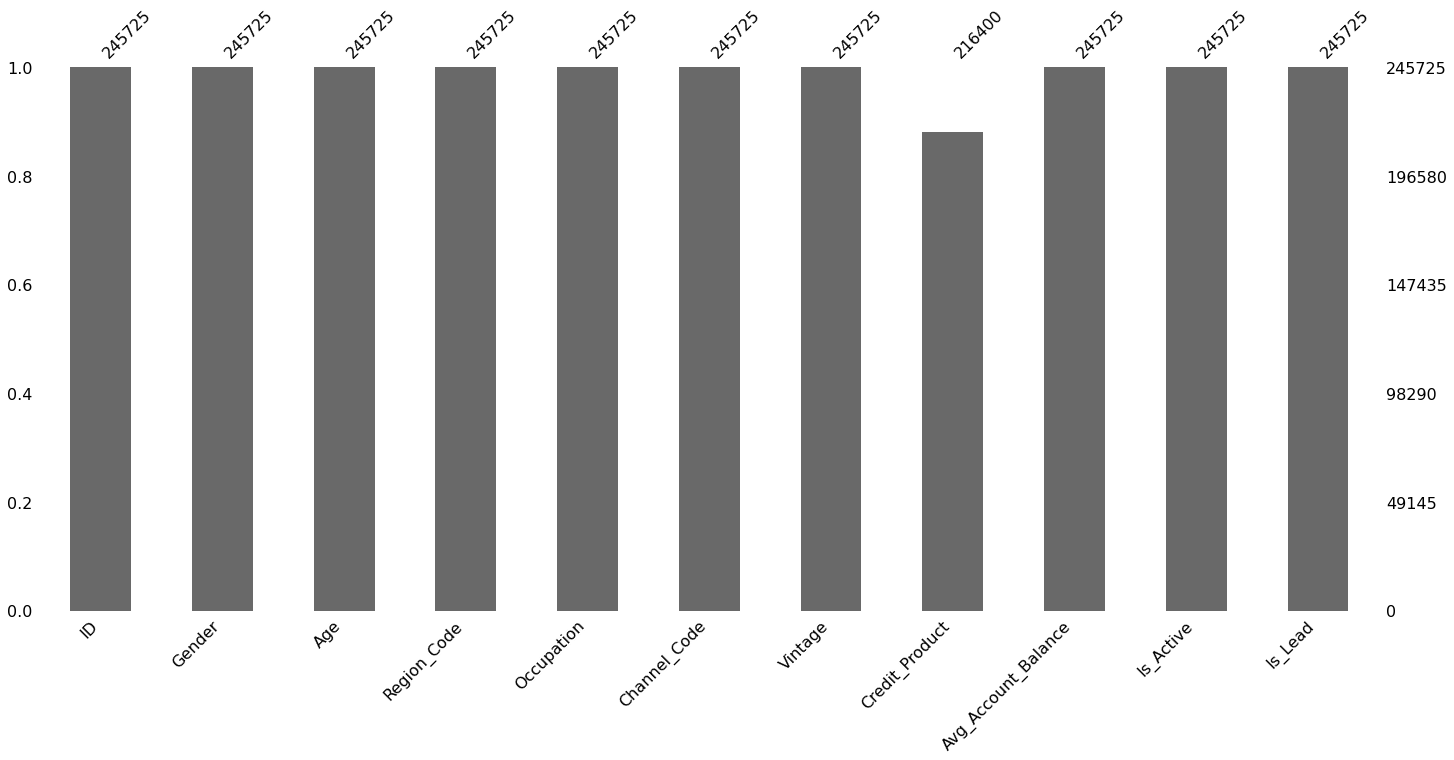

In [ ]:
msno.bar(train_data)

Missing Values in the Credit_Product colmn is important so cannot use delete option

In [ ]:
train_data['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [ ]:
train_data['Credit_Product']=train_data['Credit_Product'].fillna('new')

In [ ]:
train_data.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

Handling Dublicate values

In [ ]:
df=train_data.duplicated()
sum(df)

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


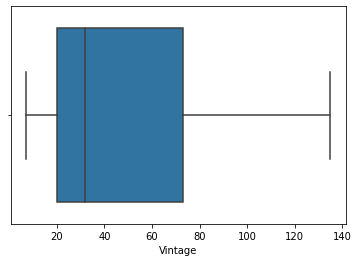

In [ ]:
sns.boxplot(train_data['Vintage'])

####Visualization of data

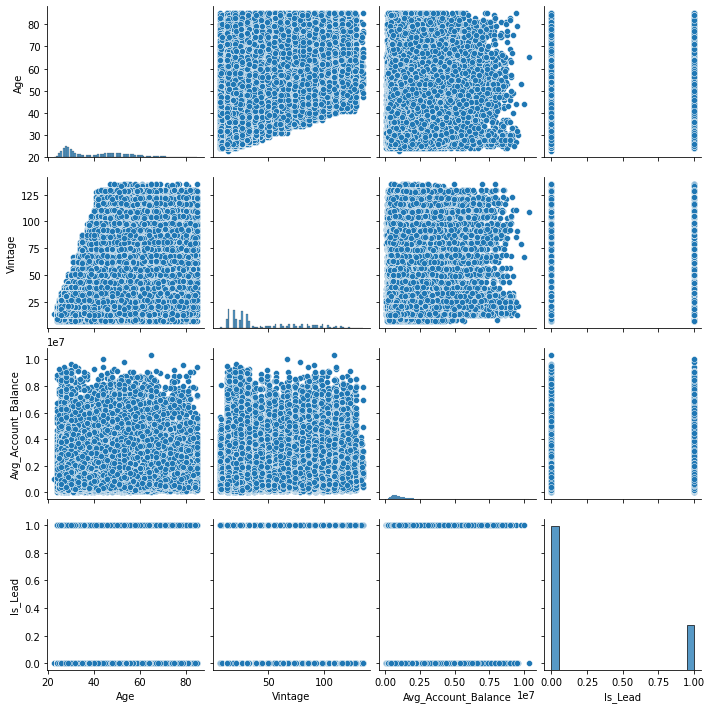

In [ ]:
sns.pairplot(train_data)

####Converting categorical values to numerical

In [ ]:
le=LabelEncoder()
train_data['ID']=le.fit_transform(train_data['ID'])
train_data['Gender']=le.fit_transform(train_data['Gender'])
train_data['Region_Code']=le.fit_transform(train_data['Region_Code'])
train_data['Occupation']=le.fit_transform(train_data['Occupation'])
train_data['Channel_Code']=le.fit_transform(train_data['Occupation'])
train_data['Credit_Product']=le.fit_transform(train_data['Credit_Product'])
train_data['Is_Active']=le.fit_transform(train_data['Is_Active'])

#####Corelation

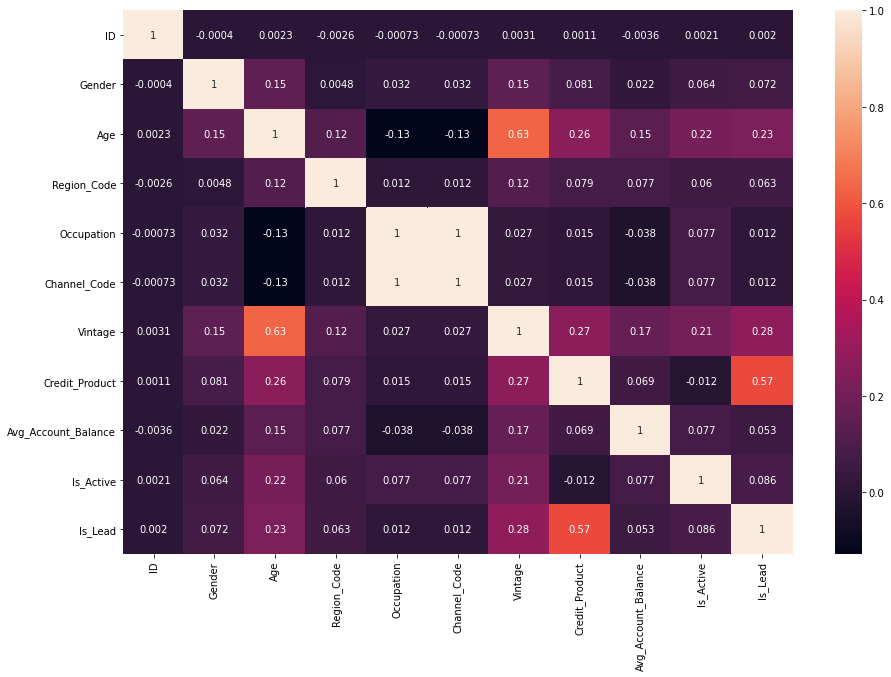

In [ ]:
plt.subplots(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot = True)

Target Data

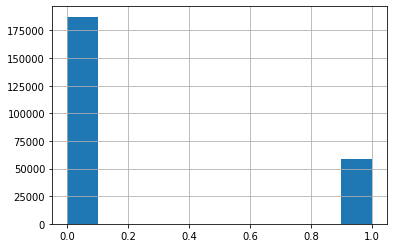

In [ ]:
train_data['Is_Lead'].hist()

In [ ]:
x=train_data.drop(['Is_Lead','ID'],axis=1).values
y=train_data['Is_Lead'].values

SMOTE

In [ ]:
smk = SMOTETomek(1.0)
x_res2,y_res2 = smk.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_res2)))

The number of classes before fit Counter({0: 187437, 1: 58288})
The number of classes after fit Counter({0: 170017, 1: 170017})


In [ ]:
after_sampling=pd.DataFrame(y_res2,columns=['y_res2'])
after_sampling.value_counts()

y_res2
1         170017
0         170017
dtype: int64

####Train test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_res2,y_res2,test_size=0.2,shuffle=True)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(272027, 9) (68007, 9) (272027,) (68007,)


In [ ]:

model = XGBClassifier()
model.fit(x_train, y_train)
y_train_pred=model.predict(x_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_pred,y_test))

0.8365529892253343
0.8363109679885894


In [ ]:
print(confusion_matrix(y_pred,y_test))

[[28828  5768]
 [ 5364 28047]]


In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.84      0.83      0.84     34596
           1       0.83      0.84      0.83     33411

    accuracy                           0.84     68007
   macro avg       0.84      0.84      0.84     68007
weighted avg       0.84      0.84      0.84     68007



####Test data

In [ ]:
test_data1.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [ ]:
test_data1.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [ ]:
test_data1.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

#####Imputing missing *values*

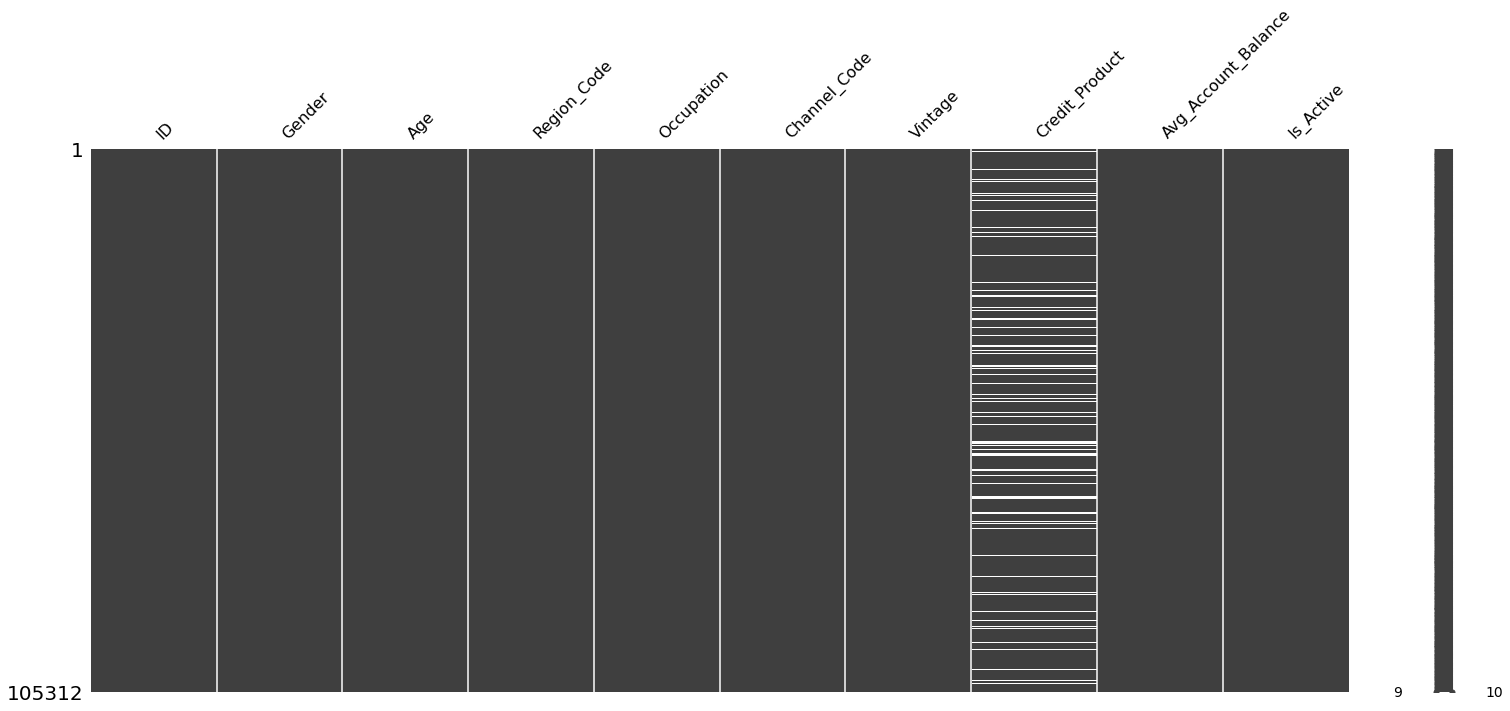

In [ ]:
msno.matrix(test_data1)

In [ ]:
test_data1['Credit_Product']=test_data1['Credit_Product'].fillna('new')

Handling Dublicate values

In [ ]:
df=test_data1.duplicated()
sum(df)

0

In [ ]:
new_data=test_data1.drop(['ID'],axis=1)


In [ ]:
test_data1['ID']


0         VBENBARO
1         CCMEWNKY
2         VK3KGA9M
3         TT8RPZVC
4         SHQZEYTZ
            ...   
105307    DBENJOYI
105308    CWQ72DWS
105309    HDESC8GU
105310    2PW4SFCA
105311    F2NOYPPZ
Name: ID, Length: 105312, dtype: object

In [ ]:
test_data1['ID']

0         VBENBARO
1         CCMEWNKY
2         VK3KGA9M
3         TT8RPZVC
4         SHQZEYTZ
            ...   
105307    DBENJOYI
105308    CWQ72DWS
105309    HDESC8GU
105310    2PW4SFCA
105311    F2NOYPPZ
Name: ID, Length: 105312, dtype: object

Converting categorical values to numerical

In [ ]:
le=LabelEncoder()
new_data['Gender']=le.fit_transform(new_data['Gender'])
new_data['Region_Code']=le.fit_transform(new_data['Region_Code'])
new_data['Occupation']=le.fit_transform(new_data['Occupation'])
new_data['Channel_Code']=le.fit_transform(new_data['Occupation'])
new_data['Credit_Product']=le.fit_transform(new_data['Credit_Product'])
new_data['Is_Active']=le.fit_transform(new_data['Is_Active'])

In [ ]:
test_data_predict=model.predict(new_data.values)


In [ ]:
len(test_data_predict)

105312

In [ ]:
y1 = pd.DataFrame()
Y1['ID']= test_data1['ID']
y1['Is_Lead'] =test_data_predict


In [ ]:
y1.to_csv('XG_OUTPUT.csv')